In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA

# the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,GradientBoostingClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score

import imblearn
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [37]:
df_label= pd.read_csv('train_labels.csv',index_col='building_id')

df_features = pd.read_csv('train_values.csv',index_col='building_id')

In [38]:
df = df_features.join(df_label)

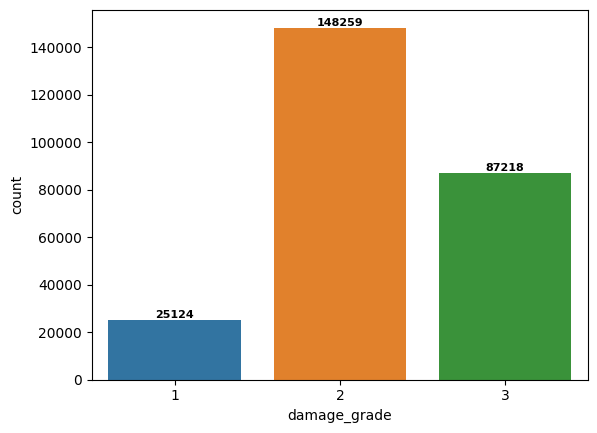

In [39]:
#Imbalanced class problem

fig, ax= plt.subplots()

sns.countplot(data=df_label,x='damage_grade')

for i in ax.containers:
    ax.bar_label(i,fontsize=8,weight='bold')

plt.show()

In [40]:
len(df_features.columns)

38

In [41]:
#No null values
df_features.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

In [42]:
object_cols=df_features.select_dtypes('object').columns

num_cols = df_features.select_dtypes(np.number).columns

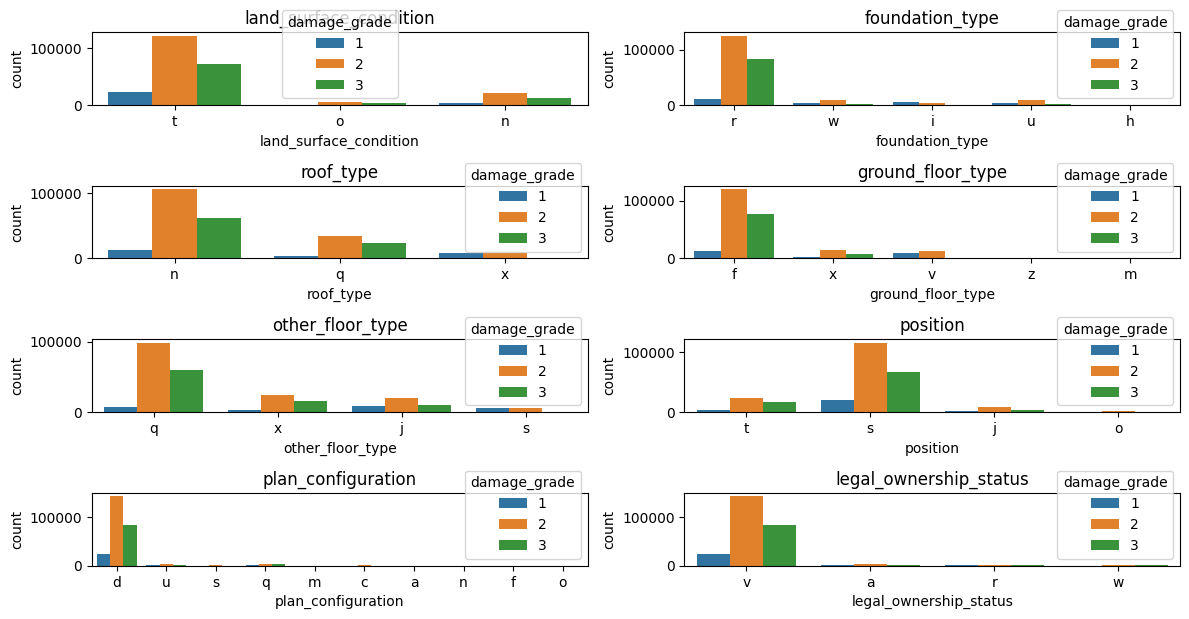

In [43]:
fig = plt.figure(figsize=(12,12))
for i, col in enumerate(object_cols):
    plt.subplot(len(object_cols), 2, i+1)
    
    ax=sns.countplot(x=col,hue='damage_grade', data=df)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [44]:
numeric_features = df_features.select_dtypes(np.number).columns
numeric_features

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

In [45]:
numeric_features = df_features.select_dtypes(np.number).columns
num_transformer = StandardScaler()

df_features[numeric_features] = num_transformer.fit_transform(df_features[numeric_features])

num_feat=df_features[numeric_features]



In [46]:
num_feat

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,3.206391,0.558971,-0.188554,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
28830,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,-0.311877,0.558971,-0.188554,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
94947,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,-0.311877,0.558971,-0.188554,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
590882,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,-0.311877,0.558971,-0.188554,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
201944,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,3.206391,-1.789003,-0.188554,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,1.381653,1.536007,-1.271644,-1.552536,0.386932,-0.459460,-1.268946,-0.311877,0.558971,-0.188554,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
669485,0.385835,0.033741,-1.151250,-0.178274,-0.360698,-0.459460,-0.226419,-0.311877,0.558971,-0.188554,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
602512,0.385835,-1.575137,0.522472,1.195989,0.386932,-0.459460,0.816109,-0.311877,0.558971,-0.188554,...,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731


In [47]:
categorical_features = df_features.select_dtypes('object').columns

ohe = OneHotEncoder(handle_unknown="ignore")



df_ohe = pd.DataFrame(ohe.fit_transform(df_features[categorical_features]).toarray(), 
                      columns=ohe.get_feature_names_out(categorical_features))

df_ohe.set_index(df_features[categorical_features].index,inplace=True)

df_ohe

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28830,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
94947,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
590882,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
201944,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
669485,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
602512,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
feat_prep = pd.concat([num_feat,df_ohe],axis=1)

In [49]:
df = feat_prep.join(df_label)

df

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,3.206391,0.558971,-0.188554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
28830,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,-0.311877,0.558971,-0.188554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
94947,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,-0.311877,0.558971,-0.188554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
590882,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,-0.311877,0.558971,-0.188554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
201944,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,3.206391,-1.789003,-0.188554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,1.381653,1.536007,-1.271644,-1.552536,0.386932,-0.459460,-1.268946,-0.311877,0.558971,-0.188554,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
669485,0.385835,0.033741,-1.151250,-0.178274,-0.360698,-0.459460,-0.226419,-0.311877,0.558971,-0.188554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
602512,0.385835,-1.575137,0.522472,1.195989,0.386932,-0.459460,0.816109,-0.311877,0.558971,-0.188554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [50]:
#oversample = SMOTE()

#X,y =df_features , df_label

#X, y = oversample.fit_resample(X, y)

In [51]:
#df['damage_grade']

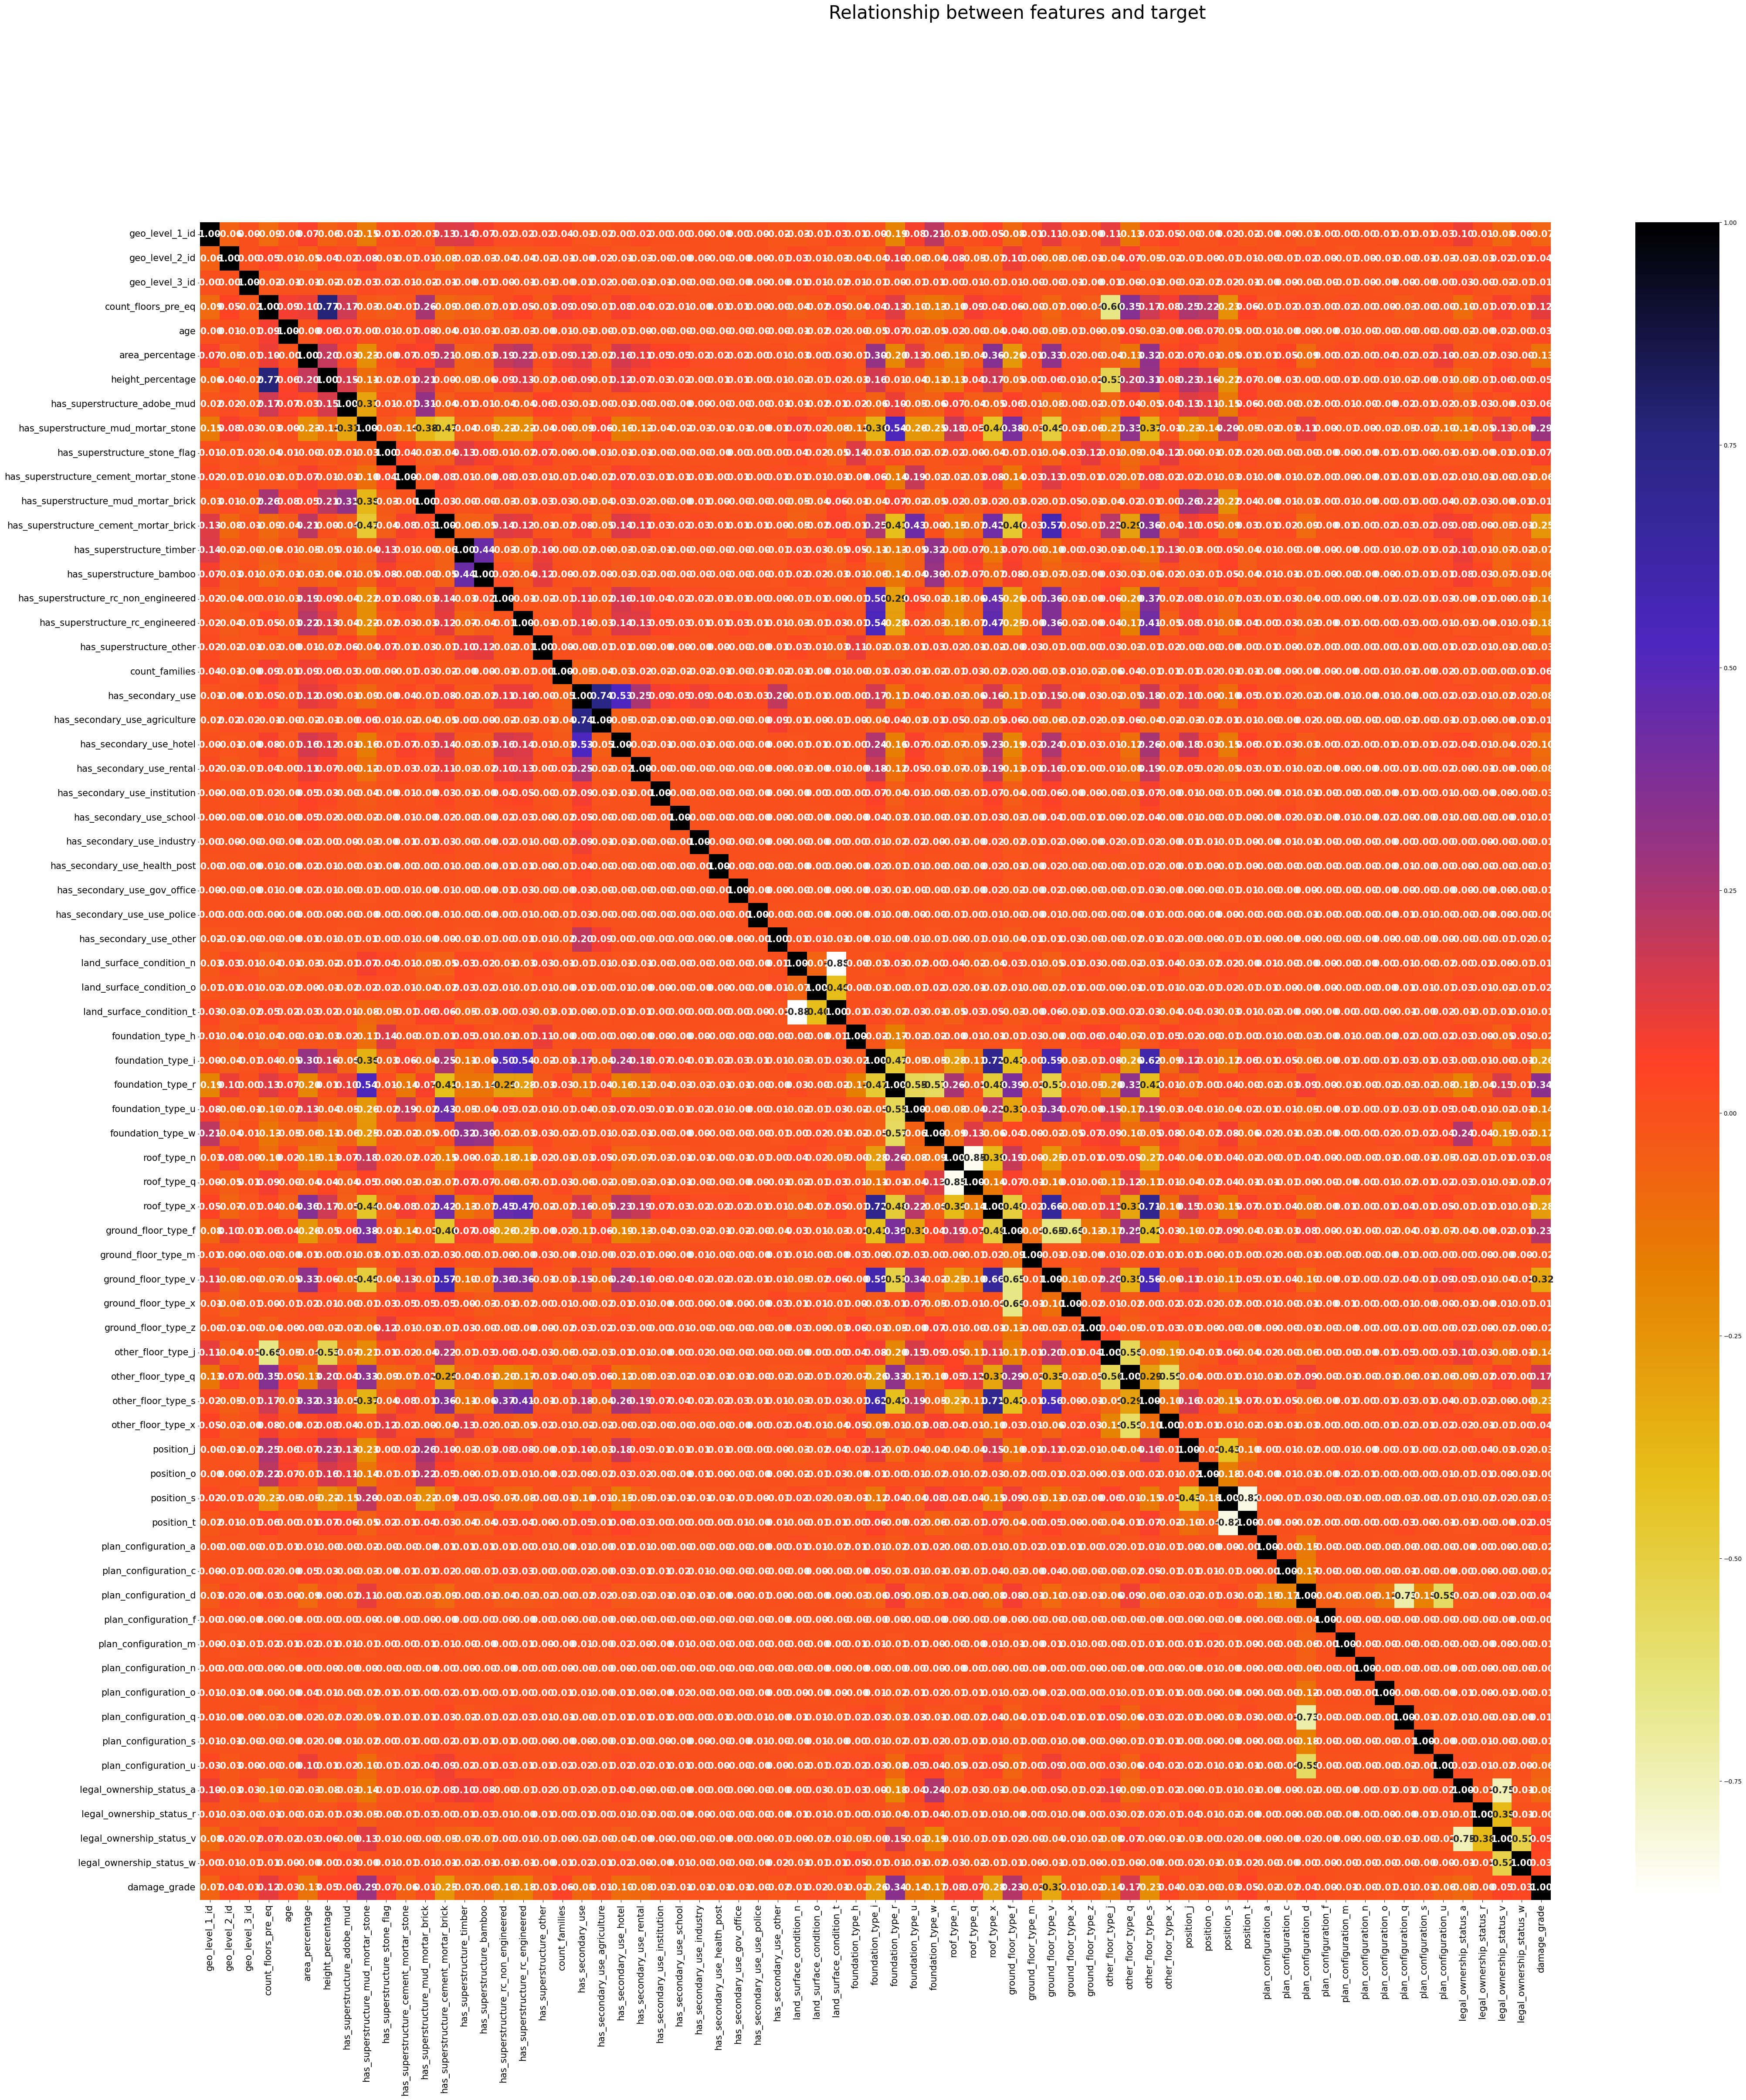

In [52]:
#Looking at the Multicolinearity and the relationship between Features and target
fig, ax= plt.subplots(figsize=(50,50))
sns.heatmap(df.corr(),annot=True,annot_kws={'size': 15,'weight': 'bold'},cmap='CMRmap_r',fmt=".2f")
plt.suptitle("Relationship between features and target",size=30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()


In [53]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [54]:
corr_features=correlation(df,0.7)
len(set(corr_features))

9

In [55]:
corr_features

{'has_secondary_use_agriculture',
 'height_percentage',
 'land_surface_condition_t',
 'legal_ownership_status_v',
 'other_floor_type_s',
 'plan_configuration_q',
 'position_t',
 'roof_type_q',
 'roof_type_x'}

In [56]:
df.drop(corr_features,axis=1,inplace=True)

In [57]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(feat_prep, np.ravel(df_label))
mutual_info

array([1.33290279e-01, 2.35687479e-01, 2.95793486e-01, 2.59759405e-02,
       3.22922564e-02, 1.24798329e-02, 2.28937626e-02, 1.11603899e-02,
       6.35961507e-02, 7.11640411e-03, 6.92232647e-03, 1.07702055e-02,
       3.97460217e-02, 1.45131468e-02, 1.17913554e-02, 1.79832352e-02,
       2.13450928e-02, 4.80174295e-03, 5.72849736e-03, 1.06959588e-02,
       9.93303825e-03, 9.70243139e-03, 4.79142398e-03, 1.10991372e-04,
       0.00000000e+00, 4.78799615e-05, 9.35467541e-04, 0.00000000e+00,
       9.61241875e-04, 2.90327834e-03, 2.05289337e-03, 0.00000000e+00,
       1.78241720e-02, 0.00000000e+00, 3.45115782e-02, 8.25837108e-02,
       9.52354472e-03, 1.66375233e-02, 1.89440742e-02, 3.01810369e-03,
       4.09538717e-02, 5.00629095e-02, 1.27853651e-03, 5.35710388e-02,
       1.45756251e-03, 1.07195884e-03, 1.42766026e-02, 3.86862111e-02,
       2.50701492e-02, 3.15117972e-04, 0.00000000e+00, 1.12151938e-03,
       1.74491919e-02, 3.95892988e-03, 1.32129984e-03, 1.63295296e-03,
      

In [58]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = feat_prep.columns
mutual_info.sort_values(ascending=False) #Looking at the most important features

geo_level_3_id                         0.295793
geo_level_2_id                         0.235687
geo_level_1_id                         0.133290
foundation_type_r                      0.082584
has_superstructure_mud_mortar_stone    0.063596
                                         ...   
has_secondary_use_school               0.000000
land_surface_condition_o               0.000000
position_j                             0.000000
has_secondary_use_gov_office           0.000000
legal_ownership_status_w               0.000000
Length: 68, dtype: float64

In [59]:

features_elim =mutual_info[mutual_info.values ==0].keys()

features_elim
    



Index(['has_secondary_use_school', 'has_secondary_use_gov_office',
       'land_surface_condition_o', 'foundation_type_h', 'position_j',
       'plan_configuration_o', 'legal_ownership_status_w'],
      dtype='object')

In [60]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'land_surface_condition_n', 'land_surface_condition_o',
       'foundation_type_h', 'foundatio

In [61]:
df.drop(['land_surface_condition_o', 'ground_floor_type_m',
       'ground_floor_type_z', 'position_o', 'plan_configuration_f',
       'plan_configuration_m',
       'legal_ownership_status_w'], axis=1,inplace=True)

In [62]:
df

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_n,plan_configuration_o,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,3.206391,0.558971,-0.188554,-0.136284,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
28830,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,-0.311877,0.558971,-0.188554,-0.136284,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
94947,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.311877,0.558971,-0.188554,-0.136284,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
590882,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.311877,0.558971,-0.188554,-0.136284,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
201944,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,3.206391,-1.789003,-0.188554,-0.136284,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,1.381653,1.536007,-1.271644,-1.552536,0.386932,-0.459460,-0.311877,0.558971,-0.188554,-0.136284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
669485,0.385835,0.033741,-1.151250,-0.178274,-0.360698,-0.459460,-0.311877,0.558971,-0.188554,-0.136284,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
602512,0.385835,-1.575137,0.522472,1.195989,0.386932,-0.459460,-0.311877,0.558971,-0.188554,-0.136284,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [63]:
##wcss=[]
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
##for i in range(1,11): 
##     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
#i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.
##     kmeans.fit(X)
#kmeans algorithm fits to the X dataset
##     wcss.append(kmeans.inertia_)
#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
#4.Plot the elbow graph
##plt.plot(range(1,11),wcss)
##plt.title('The Elbow Method Graph')
##plt.xlabel('Number of clusters')
##plt.ylabel('WCSS')
##plt.show()

In [64]:
#5 According to the Elbow graph we deterrmine the clusters number as #5. Applying k-means algorithm to the X dataset.
##kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
##y_kmeans = kmeans.fit_predict(X)

In [65]:
##df['localization']= y_kmeans

In [66]:
#kmeans = KMeans(n_clusters=4)
#kmeans.fit(df[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']])

# Create the 3D scatter plot
#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', marker='x')
#ax.scatter(df['geo_level_1_id'], df['geo_level_2_id'], df['geo_level_3_id'], c=kmeans.labels_, cmap='viridis')
# ax.set_xlabel('geo_level_1_id')
# ax.set_ylabel('geo_level_2_id')
# ax.set_zlabel('geo_level_3_id')
# plt.show()


In [67]:



#oversample = SMOTE()

#X,y =df_features , df_label

#X, y = oversample.fit_resample(X, y)

In [68]:
oversample = SMOTE()

X = df.drop(['damage_grade'],axis=1)
y = df['damage_grade']

X, y = oversample.fit_resample(X, y)

In [69]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [70]:
estimadores={
    'KNN' : KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=50),
    'GradientBoosting' : GradientBoostingClassifier(n_estimators=50)
    }

for name, estimador in estimadores.items():
    estimador.fit(X_train,y_train)
    predictions = estimador.predict(X_test)

    print("="*32)
    print(name)
    f1_score_pred=f1_score(y_test,predictions,average='micro')
    print("f1_score_predictions: ",f1_score_pred)

KNN
f1_score_predictions:  0.7503305004721436
RandomForest
f1_score_predictions:  0.8215297450424929


In [ ]:
pca = PCA(n_components=5)asd
pca.fit(num_cols)

PCA(n_components=5)

In [ ]:
pipe.fit(num_cols,df_target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2018))])

In [ ]:
preds=pipe.predict(num_cols)
f1_score(df_target, preds, average='micro')

0.9688489299734077

In [ ]:
col=num_cols.columns

<b>Test set</b>

######################################################################################

In [ ]:
test_values= pd.read_csv('test_values.csv',index_col='building_id')

In [ ]:
X = test_values.iloc[:, [0,1,2]].values
X

array([[   17,   596, 11307],
       [    6,   141, 11987],
       [   22,    19, 10044],
       ...,
       [   22,  1136,  7712],
       [    6,  1041,   912],
       [   26,    36,  6436]], dtype=int64)

In [ ]:
#5 According to the Elbow graph we deterrmine the clusters number as #5. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)

test_values['localization']= y_kmeans

In [ ]:
num_features=test_values.select_dtypes(np.number)



In [ ]:
predictions = pipe.predict(num_features)

print(predictions)

[2 2 2 ... 2 2 2]


In [ ]:
np.unique(predictions,return_counts=True)

(array([1, 2, 3], dtype=int64), array([ 3866, 71123, 11879], dtype=int64))